In [ ]:
import nltk
import pandas as pd

In [ ]:
text = "Wardell Stephen Curry II is an American professional basketball player for the Golden State Warriors of the National Basketball Association (NBA). Widely regarded as one of the greatest basketball players of all time, and as the greatest shooter in NBA history"

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#tokenize to words
words = nltk.word_tokenize(text)
words

['Wardell',
 'Stephen',
 'Curry',
 'II',
 'is',
 'an',
 'American',
 'professional',
 'basketball',
 'player',
 'for',
 'the',
 'Golden',
 'State',
 'Warriors',
 'of',
 'the',
 'National',
 'Basketball',
 'Association',
 '(',
 'NBA',
 ')',
 '.',
 'Widely',
 'regarded',
 'as',
 'one',
 'of',
 'the',
 'greatest',
 'basketball',
 'players',
 'of',
 'all',
 'time',
 ',',
 'and',
 'as',
 'the',
 'greatest',
 'shooter',
 'in',
 'NBA',
 'history']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#Part of speech tagging
pos_tags = nltk.pos_tag(words)
pos_tags

NameError: ignored

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
#check nltk help for description of the tag
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
chunks = nltk.ne_chunk(pos_tags, binary=True) #either NE or not NE
for chunk in chunks:
    print(chunk)

(NE Wardell/NNP Stephen/NNP Curry/NNP)
('II', 'NNP')
('is', 'VBZ')
('an', 'DT')
(NE American/JJ)
('professional', 'NN')
('basketball', 'NN')
('player', 'NN')
('for', 'IN')
('the', 'DT')
(NE Golden/NNP State/NNP)
('Warriors', 'NNS')
('of', 'IN')
('the', 'DT')
(NE National/NNP Basketball/NNP Association/NNP)
('(', '(')
(NE NBA/NNP)
(')', ')')
('.', '.')
('Widely', 'RB')
('regarded', 'VBD')
('as', 'IN')
('one', 'CD')
('of', 'IN')
('the', 'DT')
('greatest', 'JJS')
('basketball', 'NN')
('players', 'NNS')
('of', 'IN')
('all', 'DT')
('time', 'NN')
(',', ',')
('and', 'CC')
('as', 'IN')
('the', 'DT')
('greatest', 'JJS')
('shooter', 'NN')
('in', 'IN')
(NE NBA/NNP)
('history', 'NN')


In [ ]:
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df

,Entities,Labels
0,National Basketball Association,NE
1,Golden State,NE
2,Wardell Stephen Curry,NE
3,NBA,NE
4,American,NE


In [ ]:
chunks = nltk.ne_chunk(pos_tags, binary=False) #either NE or not NE
for chunk in chunks:
    print(chunk)
    
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df

(PERSON Wardell/NNP)
(PERSON Stephen/NNP Curry/NNP II/NNP)
('is', 'VBZ')
('an', 'DT')
(GPE American/JJ)
('professional', 'NN')
('basketball', 'NN')
('player', 'NN')
('for', 'IN')
('the', 'DT')
(ORGANIZATION Golden/NNP)
('State', 'NNP')
('Warriors', 'NNS')
('of', 'IN')
('the', 'DT')
(ORGANIZATION National/NNP Basketball/NNP Association/NNP)
('(', '(')
(ORGANIZATION NBA/NNP)
(')', ')')
('.', '.')
('Widely', 'RB')
('regarded', 'VBD')
('as', 'IN')
('one', 'CD')
('of', 'IN')
('the', 'DT')
('greatest', 'JJS')
('basketball', 'NN')
('players', 'NNS')
('of', 'IN')
('all', 'DT')
('time', 'NN')
(',', ',')
('and', 'CC')
('as', 'IN')
('the', 'DT')
('greatest', 'JJS')
('shooter', 'NN')
('in', 'IN')
(ORGANIZATION NBA/NNP)
('history', 'NN')


,Entities,Labels
0,Stephen Curry II,PERSON
1,Golden,ORGANIZATION
2,National Basketball Association,ORGANIZATION
3,American,GPE
4,NBA,ORGANIZATION
5,Wardell,PERSON


In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy import displacy

In [ ]:
spacy.__version__

'3.4.3'

In [ ]:
!python -m spacy download en_core_web_sm

2022-11-30 17:47:36.670320: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 1.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(text)

entities = []
labels = []
position_start = []
position_end = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df

,Entities,Labels,Position_Start,Position_End
0,"(Wardell, Stephen, Curry, II)",PERSON,0,24
1,(American),NORP,31,39
2,"(the, Golden, State, Warriors)",FAC,75,100
3,"(the, National, Basketball, Association)",ORG,104,139
4,(NBA),ORG,141,144
5,(NBA),ORG,249,252


In [ ]:

spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

SENTENCE SEGMENTATION


In [ ]:
!python -m spacy download en_core_web_md


2022-11-30 17:48:03.220197: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 67.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp = spacy.load("en_core_web_md")


In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")


doc = nlp(text)
for sent in doc.sents:
    print("***")
    print(sent.text)


***
Wardell Stephen Curry II is an American professional basketball player for the Golden State Warriors of the National Basketball Association (NBA).
***
Widely regarded as one of the greatest basketball players of all time, and as the greatest shooter in NBA history


In [ ]:
pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Implement sentiment analysis technique for classifying the data into positive , negative or neutral class 

In [ ]:
import string 
from collections import Counter
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [ ]:
lower_case = text.lower()

In [ ]:
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# splitting text into words
tokenized_words = cleaned_text.split()


In [ ]:
tokenized_words

['wardell',
 'stephen',
 'curry',
 'ii',
 'is',
 'an',
 'american',
 'professional',
 'basketball',
 'player',
 'for',
 'the',
 'golden',
 'state',
 'warriors',
 'of',
 'the',
 'national',
 'basketball',
 'association',
 'nba',
 'widely',
 'regarded',
 'as',
 'one',
 'of',
 'the',
 'greatest',
 'basketball',
 'players',
 'of',
 'all',
 'time',
 'and',
 'as',
 'the',
 'greatest',
 'shooter',
 'in',
 'nba',
 'history']

In [ ]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [ ]:
# Removing stop words from the tokenized words list
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

In [ ]:
# NLP Emotion Algorithm
# 1) Check if the word in the final word list is also present in emotion.txt
#  - open the emotion file
#  - Loop through each line and clear it
#  - Extract the word and emotion using split

# 2) If word is present -> Add the emotion to emotion_list
# 3) Finally count each emotion in the emotion list


In [ ]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in final_words:
            emotion_list.append(emotion)


In [ ]:
print(emotion_list)
w = Counter(emotion_list)
print(w)

[]
Counter()


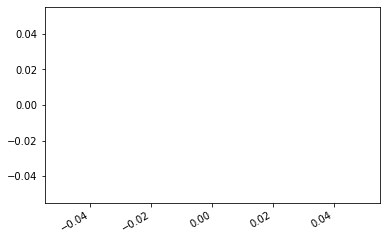

In [ ]:
# Plotting the emotions on the graph

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()